In [19]:
from utils import get_amazon_importance
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('fivethirtyeight')


In [2]:
model_basename = "opt-13b"
prune_method = "imbalanced_correct"
prune_task = "hellaswag"
metric = "cosine"
group_metric = "cosine"
prune_percent = 0.5
metric_path = metric + "_" + group_metric
path_log = Path("pruning_logs") / model_basename / prune_method / prune_task / metric_path / str(prune_percent) / "pruning_log.txt"
pruning_log = []
with open(path_log, "r") as f:
    lines = f.readlines()
    for line in lines:
        layer, head_to_keep, head_to_prune = map(int, line.strip().split(","))
        pruning_log.append((layer, head_to_prune))
        
similarity_list = [40]*40
for pruned_head in pruning_log:
    similarity_list[pruned_head[0]] -= 1


In [3]:
amazon_list = get_amazon_importance()
amazon_list.sort(key=lambda x: x[2])
amazon_list = amazon_list[:800]
amazon_importance = [40]*40
amazon_list
for pruned_head in amazon_list:
    amazon_importance[pruned_head[0]] -= 1
print(amazon_importance)


[40, 4, 3, 4, 8, 14, 20, 22, 18, 15, 14, 16, 13, 18, 16, 16, 17, 20, 25, 34, 32, 37, 36, 40, 34, 38, 39, 31, 34, 32, 27, 17, 12, 12, 6, 11, 9, 2, 3, 11]


In [10]:
print(similarity_list)
print(amazon_importance)

list1 = similarity_list
list2 = amazon_importance

[30, 6, 4, 8, 10, 24, 22, 26, 26, 26, 24, 22, 22, 24, 18, 16, 20, 16, 16, 20, 20, 26, 26, 24, 24, 24, 24, 22, 24, 26, 20, 16, 20, 24, 18, 24, 18, 14, 16, 10]
[40, 4, 3, 4, 8, 14, 20, 22, 18, 15, 14, 16, 13, 18, 16, 16, 17, 20, 25, 34, 32, 37, 36, 40, 34, 38, 39, 31, 34, 32, 27, 17, 12, 12, 6, 11, 9, 2, 3, 11]


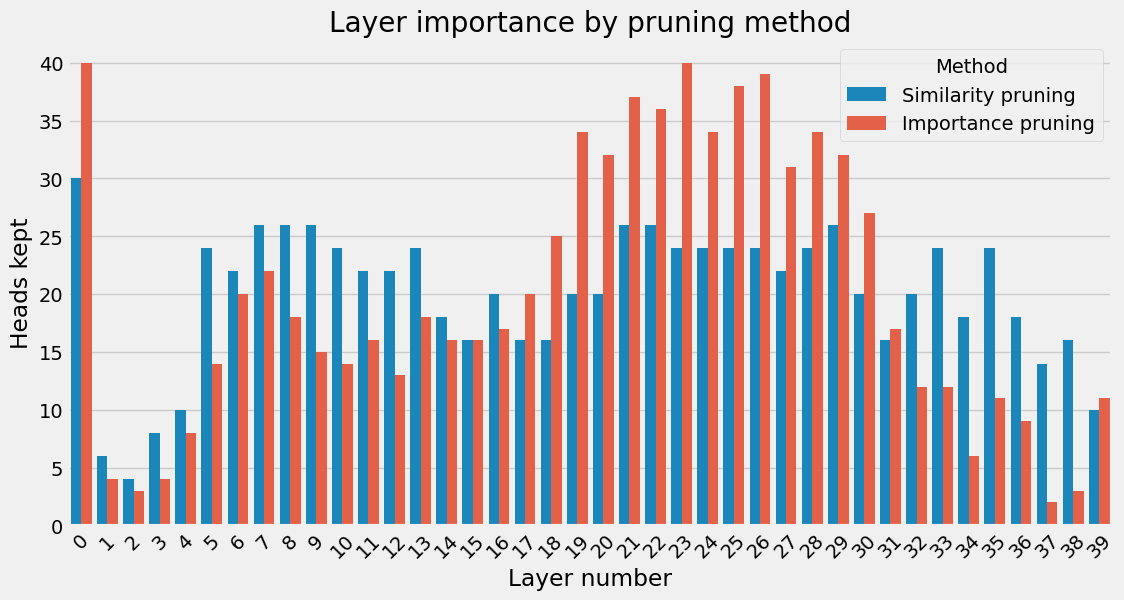

In [22]:
# Adjusting the x labels for better appearance
plt.figure(figsize=(12, 6))

bar_width = 0.35  # Width of the bars

# Creating indices for each list to avoid overlapping
x1 = [i - bar_width/2 for i in range(len(list1))]
x2 = [i + bar_width/2 for i in range(len(list1))]

# Adjusting the DataFrame for seaborn
data = pd.DataFrame({
    'Index': list(range(len(list1))) * 2,
    'Value': list1 + list2,
    'Method': ['Similarity pruning'] * len(list1) + ['Importance pruning'] * len(list2)
})

# Plotting with seaborn
sns.barplot(data=data, x='Index', y='Value', hue='Method', dodge=True)

plt.xlabel('Layer number')
plt.ylabel('Heads kept')
plt.title('Layer importance by pruning method')
plt.xticks(rotation=45)
plt.show()